## Preparing Dataset for Central London CO, NO, PM10 and PM2.5 forecast

In [26]:
from glob import glob
from numpy import isnan
from pandas import read_csv,to_datetime, concat, merge
from matplotlib import pyplot

In [2]:
# fill missing values with the data available at last timestamp
def fill_missing(df):
    for row in range( df.shape[0] ):
        if isnan(df.Value[row]):
            if row == 0:
                df.Value[row] = 0
            else:
                df.Value[row] = df.Value[row - 1]
    return df

In [5]:
# Species list
species = ['CO', 'NO', 'PM10', 'PM2.5']

### Load data files of different areas of Central London

In [19]:
# All data files contains data from 01-Jan-2020 to 24-Jan-2020 on 15 minutes interval.
# Different data files from different sites and each file contains site location in file name
# Final dataframe
final_df = None
for file in glob("./data/LaqnData*.csv"):
    df = read_csv(file)
    df = df.drop({'Units','Provisional or Ratified'}, axis=1)
    for specie in species:
        df_specie = df.loc[df['Species'] == specie]
        if not df_specie.empty:
            if df_specie.shape[0] > df_specie.Value.isnull().sum():
                df_specie.reset_index(drop=True, inplace=True)
                df_specie = fill_missing( df_specie )
                df_specie = df_specie.drop({'Site','Species'}, axis=1 )
                df_specie.rename({'Value': specie}, inplace=True, axis=1)
                df_specie['ReadingDateTime'] = to_datetime(df_specie.ReadingDateTime)
                df_specie.set_index('ReadingDateTime',inplace=True)
                df_specie = df_specie.resample( '30Min' )
                df_specie = df_specie.mean()
                if final_df is None:
                    final_df = df_specie
                elif specie in final_df.columns:
                    final_df = concat([final_df, df_specie])
                    final_df = final_df.resample( '30Min' )
                    final_df = final_df.mean()
                else:
    #                 print(specie)
                    final_df = merge(final_df, df_specie, on='ReadingDateTime')
            

/home/ravi/anaconda3/envs/opencv-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ravi/anaconda3/envs/opencv-env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/ravi/anaconda3/envs/opencv-env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
final_df.head(n=48)

,NO,PM10,PM2.5,CO
ReadingDateTime,,,,
2020-01-01 00:00:00,19.996973,56.893359,56.03750,0.40
2020-01-01 00:30:00,27.111914,60.546875,56.03750,0.40
2020-01-01 01:00:00,29.509375,61.082813,49.26875,0.40
2020-01-01 01:30:00,30.434473,61.300781,49.26875,0.40
2020-01-01 02:00:00,32.455176,56.439062,46.58750,0.40
2020-01-01 02:30:00,23.069824,50.443750,46.58750,0.40
2020-01-01 03:00:00,20.281543,44.059766,40.36875,0.40
2020-01-01 03:30:00,21.913379,42.475000,40.36875,0.40
2020-01-01 04:00:00,16.217480,39.350391,38.63750,0.40


In [21]:
final_df.tail()

,NO,PM10,PM2.5,CO
ReadingDateTime,,,,
2020-12-24 21:30:00,4.326074,6.113672,5.406250,0.3
2020-12-24 22:00:00,5.312988,7.758203,4.834375,0.3
2020-12-24 22:30:00,3.999414,8.018750,4.821875,0.3
2020-12-24 23:00:00,2.964258,6.669141,3.643750,0.3
2020-12-24 23:30:00,3.538574,6.945312,3.640625,0.3


In [22]:
final_df.shape

(17232, 4)

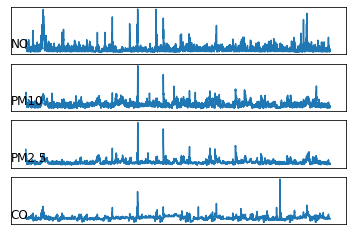

In [141]:
# line plot for each species
pyplot.figure()
for i in range(len(final_df.columns)):
    # create subplot
    pyplot.subplot(len(final_df.columns), 1, i+1)
    # get variable name
    name = final_df.columns[i]
    # plot data
    pyplot.plot(final_df[name])
    # set title
    pyplot.title(name, y=0, loc= 'left')
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()

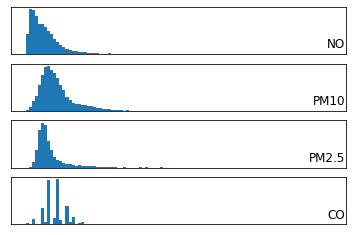

In [142]:
# Gaussin ditribution for each species
pyplot.figure()
for i in range(len(final_df.columns)):
    # create subplot
    pyplot.subplot(len(final_df.columns), 1, i+1)
    # get variable name
    name = final_df.columns[i]
    # create histogram
    final_df[name].hist(bins=100)
    # set title
    pyplot.title(name, y=0, loc= 'right' )
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()

## LSTM Models 

In [32]:
# univariate multi-step lstm for the power usage dataset
from math import sqrt
from numpy import split
from numpy import array
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [143]:
# split a multivariate dataset into train/test sets
def split_dataset(data, lag=2):
    # split into 11 month, 23 days and 1 day for train, test and validation set correspondingly
    train, test, validate = data[:-1152], data[-1152:-48], data[-48:]
#     print( "Train shape: {}, Test shape: {} and Validate shape: {}".format( train.shape, test.shape, validate.shape ) )
    # restructure into windows of data
    train = array(split(train, len(train)/lag))
    test = array(split(test, len(test)/lag))
    validate = array(split(validate, len(validate)/lag))
    print( "Train shape: {}, Test shape: {} and Validate shape: {}".format( train.shape, test.shape, validate.shape ) )
    return train, test, validate

In [56]:
train, test, validate = split_dataset(final_df.values)

Train shape: (8040, 2, 4), Test shape: (552, 2, 4) and Validate shape: (24, 2, 4)


In [53]:
# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
    # flatten data
    data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
        # define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        # ensure we have enough data for this instance
        if out_end <= len(data):
            X.append(data[in_start:in_end, :])
            y.append(data[in_end, :])
            # move along one time step
            in_start += 1
    return array(X), array(y)

In [120]:
n_input = 2
# prepare data
train_x, train_y = to_supervised(train, n_input)
# define parameters
verbose, epochs, batch_size = 0, 50, 16
n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
# define model
model = Sequential()
model.add(LSTM(200, activation= 'relu' , input_shape=(n_timesteps, n_features)))
model.add(Dense(100, activation= 'relu' ))
model.add(Dense(n_outputs))
model.compile(loss= 'mse' , optimizer= 'adam' )
# fit network
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs, batch_size=batch_size, verbose=verbose)

In [67]:
def calculate_rmse( test_y, prediction ):
    scores = list()
    for i in range(test_y.shape[1]):
        # calculate mse
        mse = mean_squared_error(test_y[:, i], prediction[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        print( i, rmse)

In [68]:
calculate_rmse( test_y, prediction )

0 3.4205465869233986
1 3.6920626495690927
2 1.7310636954885286
3 0.12008221523621751


In [66]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [121]:
model1 = Sequential()
model1.add(LSTM(200, activation= 'relu' , input_shape=(n_timesteps, n_features)))
model1.add(RepeatVector(n_outputs))
model1.add(LSTM(200, activation= 'relu' , return_sequences=True))
model1.add(TimeDistributed(Dense(100, activation= 'relu' )))
model1.add(TimeDistributed(Dense(1)))
model1.compile(loss= 'mse' , optimizer= 'adam' )
# fit network
model1.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs, batch_size=batch_size, verbose=verbose)

In [104]:
validate_x, validate_y = to_supervised(validate, n_input)

In [122]:
forecast1 = model1.predict( validate_x, verbose=verbose)

In [139]:
#Stacked LSTM RMSE score on validation data for 24 hour
print('Stacked LSTM RMSE score on validation data for 24 hour. Where 0: NO, 1: PM10, 2: PM2.5 and 3: CO;')
calculate_rmse( validate_y, forecast1 )

Stacked LSTM RMSE score on validation data for 24 hour. Where 0: NO, 1: PM10, 2: PM2.5 and 3: CO;
0 1.1078063843257766
1 1.1931733806073501
2 0.8739955088714241
3 0.07214389090571309


In [126]:
forecast2 = model.predict( validate_x, verbose=verbose)

In [140]:
#CNN-LSTM RMSE score on validation data for 24 hour
print('CNN-LSTM RMSE score on validation data for 24 hour. Where 0: NO, 1: PM10, 2: PM2.5 and 3: CO;')
calculate_rmse( validate_y, forecast2 )

CNN-LSTM RMSE score on validation data for 24 hour. Where 0: NO, 1: PM10, 2: PM2.5 and 3: CO;
0 1.6096027313244903
1 1.2094592037023435
2 1.0736656841780323
3 0.05239547440492399


In [134]:
def forecast_graph( actual, predicted ):
    pyplot.plot(actual[:,3], label='CO')
    pyplot.plot(predicted[:,3], label='CO`')
    pyplot.plot(actual[:,0], label='NO')
    pyplot.plot(predicted[:,0], label='NO`')
    pyplot.plot(actual[:,1], label='PM10')
    pyplot.plot(predicted[:,1], label='PM10`')
    pyplot.plot(actual[:,2], label='PM2.5')
    pyplot.plot(predicted[:,2], label='PM2.5`')
    pyplot.legend()
    pyplot.show()

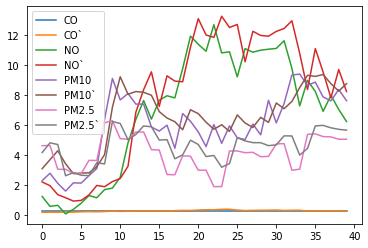

CNN-LSTM forecast acutal vs predicted


In [144]:
forecast_graph( validate_y, forecast2 )
print('CNN-LSTM forecast acutal vs predicted')

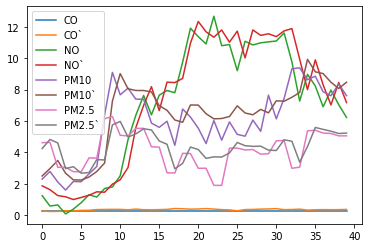

Stacked LSTM forecast acutal vs predicted


In [145]:
forecast_graph( validate_y, forecast1 )
print('Stacked LSTM forecast acutal vs predicted')